NAME- DEVLINA PAL

LETSGROWMORE INTERNSHIP ADVANCED LEVEL TASK- 1

In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from numpy import unique, argmax
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from tensorflow.keras import datasets

In [3]:
##Loading the MNIST Dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("Y_test Shape: ", y_test.shape)

X_train Shape:  (60000, 28, 28)
Y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
Y_test Shape:  (10000,)


In [8]:
#Normalization
X_train=X_train/255
X_test=X_test/255

In [9]:
##Reshaping the training and test datasets
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [10]:
len(X_train)

60000

In [11]:
len(X_test)

10000

In [13]:
## Training model using CNN
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 33s 274ms/step - loss: 0.5053 - accuracy: 0.8672
Epoch 2/10
118/118 [==============================] - 32s 274ms/step - loss: 0.1063 - accuracy: 0.9681
Epoch 3/10
118/118 [==============================] - 32s 273ms/step - loss: 0.0737 - accuracy: 0.9779
Epoch 4/10
118/118 [==============================] - 32s 273ms/step - loss: 0.0576 - accuracy: 0.9820
Epoch 5/10
118/118 [==============================] - 32s 273ms/step - loss: 0.0480 - accuracy: 0.9855
Epoch 6/10
118/118 [==============================] - 32s 273ms/step - loss: 0.0421 - accuracy: 0.9870
Epoch 7/10
118/118 [==============================] - 32s 273ms/step - loss: 0.0361 - accuracy: 0.9890
Epoch 8/10
118/118 [==============================] - 32s 272ms/step - loss: 0.0309 - accuracy: 0.9906
Epoch 9/10
118/118 [==============================] - 32s 273ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 10/10
118/118 [==============================] - 32s 273ms/step - l

In [21]:
#Model Comiled Successfully, Now Testing
model.evaluate(X_test,y_test,verbose=5)


[0.03936771675944328, 0.9876999855041504]

In [18]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08533695, 0.08533695, 0.08533757, 0.08533759, 0.08533695,
        0.08533695, 0.08533695, 0.23196615, 0.08533695, 0.08533701],
       [0.08533678, 0.08533676, 0.23196916, 0.08533675, 0.08533675,
        0.08533675, 0.08533675, 0.08533675, 0.08533675, 0.08533675],
       [0.08533944, 0.23193283, 0.08534224, 0.08533905, 0.08534514,
        0.0853391 , 0.08533911, 0.08534063, 0.08534342, 0.08533908],
       [0.2319687 , 0.08533679, 0.0853368 , 0.08533679, 0.08533679,
        0.08533679, 0.08533706, 0.08533679, 0.08533679, 0.08533679],
       [0.08533798, 0.08533804, 0.08533797, 0.08533797, 0.23194972,
        0.08533797, 0.08533798, 0.08533876, 0.08533803, 0.0853455 ]],
      dtype=float32)>

In [22]:
Y_pred=[]
pred=model.predict(X_test)
for element in pred:
    Y_pred.append(np.argmax(element))

In [23]:
Y_pred=np.array(Y_pred)
Y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Y_pred)
cm

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1132,    2,    0,    0,    0,    0,    0,    1,    0],
       [   2,    1, 1020,    3,    0,    0,    0,    1,    5,    0],
       [   1,    0,    2, 1001,    0,    2,    0,    0,    4,    0],
       [   2,    0,    1,    0,  960,    0,    4,    0,    3,   12],
       [   2,    0,    1,    6,    0,  876,    1,    1,    3,    2],
       [   5,    2,    1,    0,    1,    4,  943,    0,    2,    0],
       [   0,    4,    8,    2,    0,    0,    0, 1008,    1,    5],
       [   4,    0,    2,    0,    0,    1,    0,    0,  966,    1],
       [   1,    3,    0,    1,    3,    1,    0,    1,    5,  994]])

In [29]:
X_test=X_test.reshape(10000,28,28)

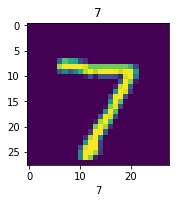

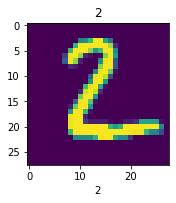

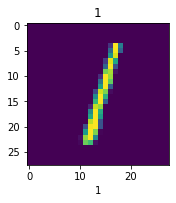

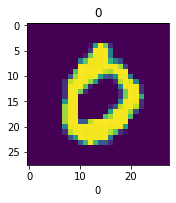

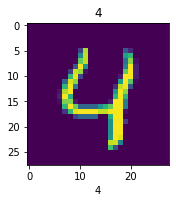

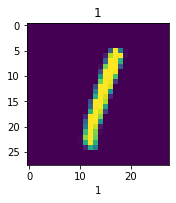

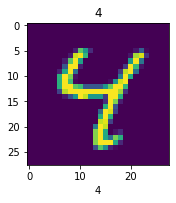

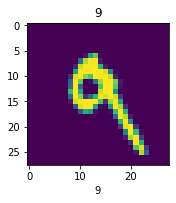

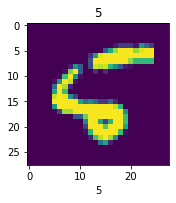

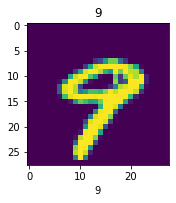

In [49]:
for i in range(0,10):
    plt.figure(figsize=(30,30))
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i])
    plt.xlabel(Y_pred[i])
    plt.title(y_test[i])

In [47]:
actual=y_test
predicted=Y_pred
final=pd.DataFrame({'Actual' :actual,'Predicted':predicted})
final.head(20)

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


Text(114.0, 0.5, 'Actual')

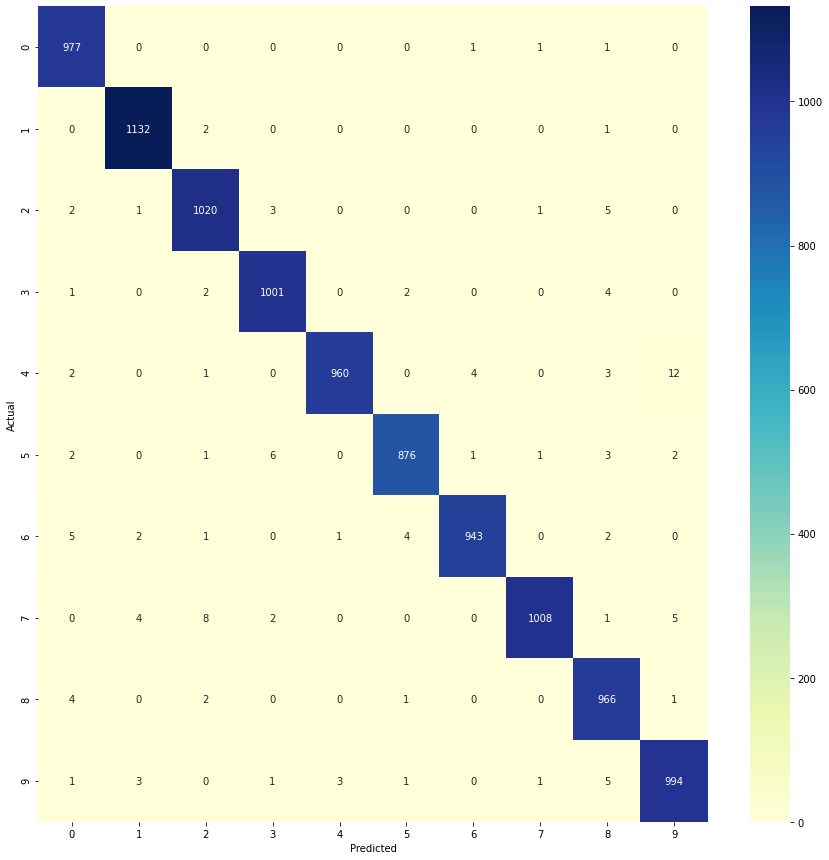

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(cm,cmap="YlGnBu",annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')